In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

## Define Constants

In [2]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
# checking the data set
dog = os.path.join('/Users/master/Downloads/Train/')

dog_train_fnames = os.listdir(dog)
print('Dog Train', dog_train_fnames[:5])

Dog Train ['dog.1753.jpg', 'dog.1035.jpg', 'dog.1021.jpg', 'coyote.828 copy.jpg', 'dog.1747.jpg']


## Prepare Training Data

In [4]:
filenames = os.listdir('/Users/master/Downloads/Train/')

categories = []

for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [5]:
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [6]:
df.head()

,filename,category
0,dog.1753.jpg,1
1,dog.1035.jpg,1
2,dog.1021.jpg,1
3,coyote.828 copy.jpg,0
4,dog.1747.jpg,1


In [7]:
df.tail()

,filename,category
2679,dog.1010.jpg,1
2680,dog.1776.jpg,1
2681,coyote.1106 copy.jpg,0
2682,dog.988.jpg,1
2683,dog.1038.jpg,1


### See Total in count

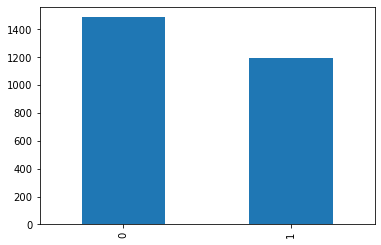

In [9]:
df['category'].value_counts().plot.bar()

## See sample image

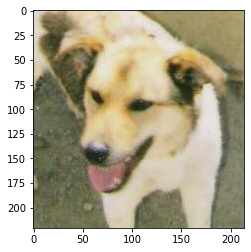

In [10]:
sample = random.choice(filenames)
image = load_img('/Users/master/Downloads/Train/' + sample)
plt.imshow(image)

## Build Model

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

## Callback

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

### Early Stop

#### To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [13]:
earlystop = EarlyStopping(patience=10)

#### Learning Rate Reduction

#### We will reduce the learning rate when then accuracy not increase for 2 steps

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [15]:
callbacks = [earlystop, learning_rate_reduction]

# Prepare the Data

Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to dog and 0 to cat

In [16]:
df.head()

,filename,category
0,dog.1753.jpg,1
1,dog.1035.jpg,1
2,dog.1021.jpg,1
3,coyote.828 copy.jpg,0
4,dog.1747.jpg,1


In [18]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

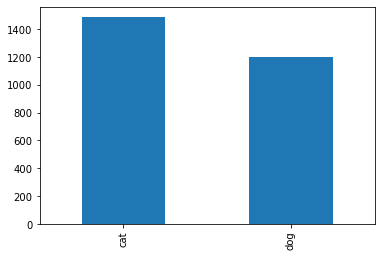

In [19]:
df['category'].value_counts().plot.bar()